In [3]:
import tensorflow as tf

mnist= tf.keras.datasets.mnist

(X_train, y_train),(X_test , y_test)= mnist.load_data()

11490434/11490434 [==============================] - 12s 1us/step


In [2]:

import numpy as np
print(np.__version__)

1.22.0


In [ ]:
#### we need to match the compatible versions otherwise it wont work.......

In [1]:
import tensorflow as tf
print(tf.__version__)


2.13.0


In [5]:
import matplotlib.pyplot as plt

#print (X_train[0])


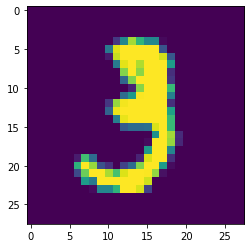

In [9]:
plt.imshow(X_train[10])

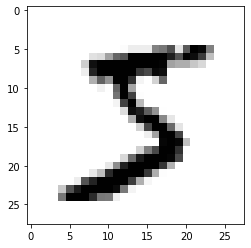

In [12]:
plt.imshow(X_train[0], cmap='binary')

In [ ]:
####    the data is varied from 0 to 255  as it is a pixel data
     
###        what we will do is normalize the data,scale it I mean

In [14]:
X_train= tf.keras.utils.normalize(X_train , axis= 1)
X_test= tf.keras.utils.normalize(X_test , axis= 1)

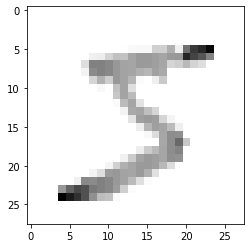

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [17]:
import matplotlib.pyplot as plt
plt.imshow(X_train[0], cmap='binary')
plt.show()
print(X_train[0])

In [19]:
model = tf.keras.models.Sequential()  # a basic feed-forward model
model.add(tf.keras.layers.Flatten())  # takes our 28x28 and makes it 1x784
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))  # a simple fully-connected layer, 128 units, relu activation
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))  # a simple fully-connected layer, 128 units, relu activation
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))  # our output layer. 10 units for 10 classes. Softmax for probability distribution

model.compile(optimizer='adam',  # Good default optimizer to start with
              loss='sparse_categorical_crossentropy',  # how will we calculate our "error." Neural network aims to minimize loss.
              metrics=['accuracy'])  # what to track

model.fit(X_train, y_train, epochs=3)  # train the model

Epoch 1/3
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2577 - accuracy: 0.9247
Epoch 2/3
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1049 - accuracy: 0.9676
Epoch 3/3
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0706 - accuracy: 0.9779


In [21]:
val_loss, val_acc = model.evaluate(X_test, y_test)  # evaluate the out of sample data with model
print(val_loss)  # model's loss (error)
print(val_acc)  # model's accuracy

313/313 [==============================] - 1s 2ms/step - loss: 0.0897 - accuracy: 0.9722
0.08971843123435974
0.9721999764442444


In [22]:
model.save('num_reader.model')

INFO:tensorflow:Assets written to: num_reader.model\assets


INFO:tensorflow:Assets written to: num_reader.model\assets


In [23]:
new_model = tf.keras.models.load_model('num_reader.model')

In [24]:
predictions = new_model.predict(X_test)

313/313 [==============================] - 1s 2ms/step


In [25]:
print(predictions)

[[7.25608684e-10 2.95165083e-08 1.02656293e-06 ... 9.99997973e-01
  3.26415717e-09 1.16228547e-08]
 [2.29936337e-08 3.37917372e-05 9.99964237e-01 ... 1.15326049e-09
  1.13319466e-07 8.72719508e-10]
 [6.57936084e-07 9.99457896e-01 3.32424715e-05 ... 1.86139776e-04
  5.63099202e-05 6.15816498e-06]
 ...
 [9.78143677e-10 6.78268890e-08 3.12620346e-10 ... 1.29901473e-05
  2.34352598e-07 1.00628953e-04]
 [6.29746410e-06 1.37101438e-06 1.96386750e-07 ... 1.44540099e-05
  2.85980050e-02 3.73303877e-08]
 [2.92637742e-06 6.96672187e-09 6.59639099e-08 ... 9.64686317e-11
  5.29644581e-07 2.30114594e-07]]


In [26]:
##################    these are probability distributions

In [27]:
import numpy as np

print(np.argmax(predictions[0]))

7


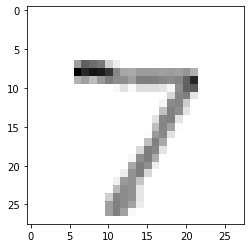

In [29]:
plt.imshow(X_test[0],cmap='binary')
plt.show()